In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
X= df.drop(['CustomerId','Surname','Exited'],axis=1)
y = df['Exited']

In [5]:
X.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
print("Categories in 'Gender' variable :=>     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Geography' variable :=>  ",end=" ")
print(df['Geography'].unique())


Categories in 'Gender' variable :=>      ['Female' 'Male']
Categories in 'Geography' variable :=>   ['France' 'Spain' 'Germany']


In [7]:
# Create Column Transformer with 2 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X.shape

(10000, 14)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape

((7500, 14), (2500, 14))

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
pip install --upgrade imbalanced-learn 

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smt = SMOTE(random_state=42,sampling_strategy='auto' , n_jobs=-1)
# Fit the model to generate the data.
X, y = smt.fit_resample(X, y)

In [20]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBRegressor": XGBClassifier(),  # Corrected to XGBClassifier
    "CatBoostClassifier": CatBoostClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

model_list = []
accuracy_list = []

def evaluate_model(true_labels, predicted_labels):
    """Calculates F1-score, recall, accuracy, and confusion matrix."""
    f1 = f1_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels,predicted_labels)
    roc_auc= roc_auc_score(true_labels,predicted_labels)
    # ... (calculate confusion matrix if needed)  # Add confusion matrix calculation here
    return f1, recall, accuracy, precision, roc_auc

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model performance
    model_train_f1, model_train_recall, model_train_accuracy, model_train_precision, model_train_rocauc_score  = evaluate_model(y_train, y_train_pred)
    model_test_f1, model_test_recall, model_test_accuracy, model_test_precision, model_test_rocauc_score = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- F1_score: {:.4f}".format(model_train_f1))
    print("- Recall_score: {:.4f}".format(model_train_recall))
    print("- Accuracy_score: {:.4f}".format(model_train_accuracy))
    print("- Precision_score: {:.4f}".format(model_train_precision))
    print("- ROC_AUC_score: {:.4f}".format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Recall_score: {:.4f}".format(model_test_recall))
    print("- Accuracy_score: {:.4f}".format(model_test_accuracy))
    print("- Precision_score: {:.4f}".format(model_test_precision))
    print("- ROC_AUC_score: {:.4f}".format(model_test_rocauc_score))

    accuracy_list.append(model_test_accuracy)

    print('=' * 35)
    print('\n')


Logistic Regression
Model performance for Training set
- F1_score: 0.3268
- Recall_score: 0.2221
- Accuracy_score: 0.8121
- Precision_score: 0.6184
- ROC_AUC_score: 0.5933
----------------------------------
Model performance for Test set
- F1_score: 0.2962
- Recall_score: 0.2032
- Accuracy_score: 0.8080
- Precision_score: 0.5459
- ROC_AUC_score: 0.5806


K-Neighbors Classifier
Model performance for Training set
- F1_score: 0.6154
- Recall_score: 0.5013
- Accuracy_score: 0.8713
- Precision_score: 0.7967
- ROC_AUC_score: 0.7341
----------------------------------
Model performance for Test set
- F1_score: 0.4644
- Recall_score: 0.3742
- Accuracy_score: 0.8284
- Precision_score: 0.6118
- ROC_AUC_score: 0.6577


Decision Tree Classifier
Model performance for Training set
- F1_score: 1.0000
- Recall_score: 1.0000
- Accuracy_score: 1.0000
- Precision_score: 1.0000
- ROC_AUC_score: 1.0000
----------------------------------
Model performance for Test set
- F1_score: 0.4985
- Recall_score: 0.509

In [21]:
pd.DataFrame(list(zip(model_list,accuracy_list)), columns=['Model Name', 'accuracy_score'])

,Model Name,accuracy_score
0,Logistic Regression,0.8080
1,K-Neighbors Classifier,0.8284
2,Decision Tree Classifier,0.7964
3,Random Forest Classifier,0.8672
4,XGBRegressor,0.8624
5,CatBoostClassifier,0.8656
6,AdaBoost Classifier,0.8592
7,GradientBoostingClassifier,0.8676


In [22]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "sqrt", "log2", None],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }

In [23]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("GB", GradientBoostingClassifier(), gradient_params)
                   
                   ]


In [24]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'sqrt', 'log2', None],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [25]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 10}
---------------- Best Params for GB -------------------
{'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 5, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [27]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=8,
                                          max_features=5,max_depth=10),
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=100,
                                                  min_samples_split=20,
                                                  max_depth=5,
                                                  loss='exponential',
                                                  criterion='friedman_mse')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*40)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8997
- F1 score: 0.8900
- Precision: 0.9183
- Recall: 0.5617
- Roc Auc Score: 0.7744
----------------------------------
Model performance for Test set
- Accuracy: 0.8672
- F1 score: 0.8538
- Precision: 0.7759
- Recall: 0.4668
- Roc Auc Score: 0.7167


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8888
- F1 score: 0.8790
- Precision: 0.8587
- Recall: 0.5487
- Roc Auc Score: 0.7627
----------------------------------
Model performance for Test set
- Accuracy: 0.8664
- F1 score: 0.8543
- Precision: 0.7587
- Recall: 0.4809
- Roc Auc Score: 0.7215




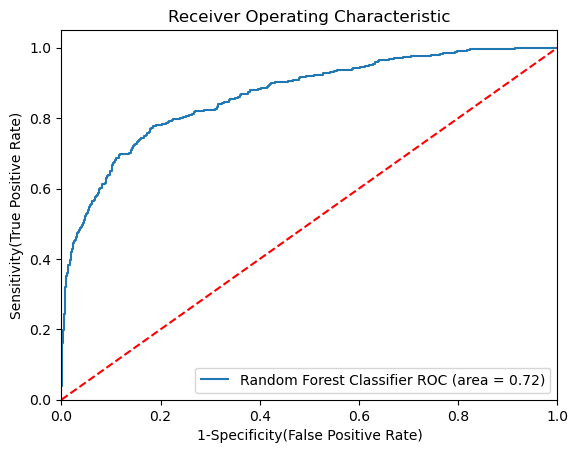

In [28]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=8,
                                          max_features=5,max_depth=10),
    'auc':  0.7167
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

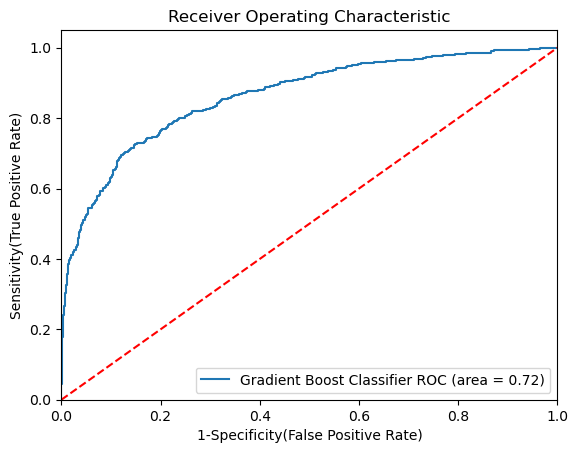

In [30]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Gradient Boost Classifier',
    'model':GradientBoostingClassifier(n_estimators=100,
                                                  min_samples_split=20,
                                                  max_depth=5,
                                                  loss='exponential',
                                                  criterion='friedman_mse'),
    'auc':  0.7215
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

In [18]:
final_model = RandomForestClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTE(random_state=42,sampling_strategy='auto', n_jobs=-1)
# Fit the model to generate the data.
X, y = smt.fit_resample(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [20]:
print("Final RandomForest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final RandomForest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final RandomForest Classifier Accuracy Score (Train) : 1.0
Final RandomForest Classifier Accuracy Score (Test) : 0.9052102950408035


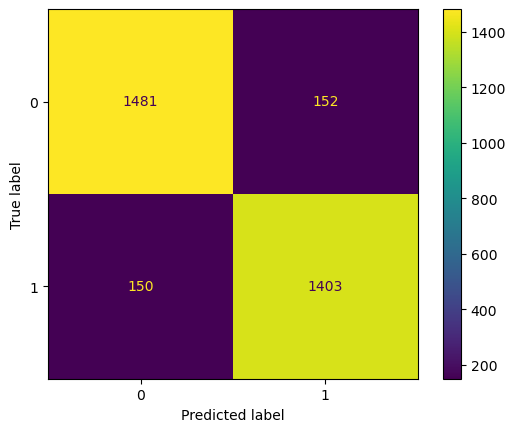

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, final_model.predict(X_test))

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
